In [1]:
import sys
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
sys.path.append("image-improvement-model")
import image_similarity

2024-10-02 18:19:40.260114: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 18:19:40.281539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 18:19:40.303622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 18:19:40.310233: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 18:19:40.327703: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def test_vgg_model_loading():
    model = image_similarity.load_vgg_model()
    if model:
        print("VGG16 model loaded successfully.")
    else:
        print("VGG16 model could not laod")

def test_feature_extraction():
    model = image_similarity.load_vgg_model()
    # Use random images for test
    test_image = np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8)
    features = image_similarity.extract_features(model, test_image)
    if features is not None and len(features) > 0:
        print("Feature Extraction Successfull.")
    else:
        print("Feature Extraction failed.")
def test_image_loading(user_image_path, hr_images_folder):
    user_image = image_similarity.load_user_image(user_image_path)
    hr_images = image_similarity.load_hr_images(hr_images_folder)

    if user_image is not None:
        print(f"User image load successfully: {user_image_path}")
    else:
        print(f"User image load failed: {user_image_path}")

    if len(hr_images) > 0:
        print(f"{len(hr_images)} HR image load successfully.")
    else:
        print(f"HR could not upload.")
def test_cosine_similarity():
    vector1 = np.random.rand(4096)  # Random vector from fc1 layer of VGG16
    vector2 = np.random.rand(4096)
    
    similarity = image_similarity.calculate_cosine_similarity(vector1, vector2)
    
    if 0 <= similarity <= 1:
        print(f"Cosine similarity calculation successful: {similarity}")
    else:
        print("Cosine similarity calculation error.")
def test_find_most_similar_image(user_image_path, hr_images_folder):
    user_image, best_match_image, best_match_filename, best_similarity = image_similarity.find_most_similar_image(user_image_path, hr_images_folder)
    
    print(f"Most similar image is : {best_match_filename} (Smilarity {best_similarity:.4f})")


In [3]:
def plot_similarity_scores(similarity_scores):
    filenames, scores = zip(*similarity_scores)

    plt.figure(figsize=(10, 6))
    plt.barh(filenames, scores, color='skyblue')
    plt.xlabel('Cosine Similarity Score')
    plt.ylabel('HR İmages')
    plt.title('İmage Similarity Scores')

    max_score_idx = scores.index(max(scores))
    plt.barh(filenames[max_score_idx], scores[max_score_idx], color='orange') #Most similar image is orange
    
    plt.tight_layout()
    plt.show()

In [4]:
def show_user_and_best_match(user_img, best_match_img, best_match_filename, best_similarity):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("User Image")
    plt.imshow(cv2.cvtColor(user_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # En benzer resmi göster
    plt.subplot(1, 2, 2)
    plt.title(f"Most Similar image is: {best_match_filename}\nSimilarity: {best_similarity:.4f}")
    plt.imshow(cv2.cvtColor(best_match_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [5]:
def test_find_most_similar_image_with_plot(user_image_path, hr_images_folder):
    user_image, best_match_image, best_match_filename, best_similarity = image_similarity.find_most_similar_image(user_image_path, hr_images_folder)
    
    # Visualizationing Similarity Scores
    hr_images = image_similarity.load_hr_images(hr_images_folder)
    similarity_scores = []
    vgg_model = image_similarity.load_vgg_model()
    user_features = image_similarity.extract_features(vgg_model, user_image)

    for filename, hr_image in hr_images:
        hr_features = image_similarity.extract_features(vgg_model, hr_image)
        similarity = image_similarity.calculate_cosine_similarity(user_features, hr_features)
        similarity_scores.append((filename, similarity))

    # show scores with bar chart
    plot_similarity_scores(similarity_scores)

    # Show User Image and Most Similar Image
    show_user_and_best_match(user_image, best_match_image, best_match_filename, best_similarity)


VGG16 modeli başarıyla yüklendi.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Özellik çıkarma başarılı.


libpng warning: iCCP: known incorrect sRGB profile


Kullanıcı resmi başarıyla yüklendi: lr_images/lr_image_7.png
133 adet HR resim başarıyla yüklendi.
Cosine benzerlik başarıyla hesaplandı: 0.7489598792348446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


libpng warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

libpng warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

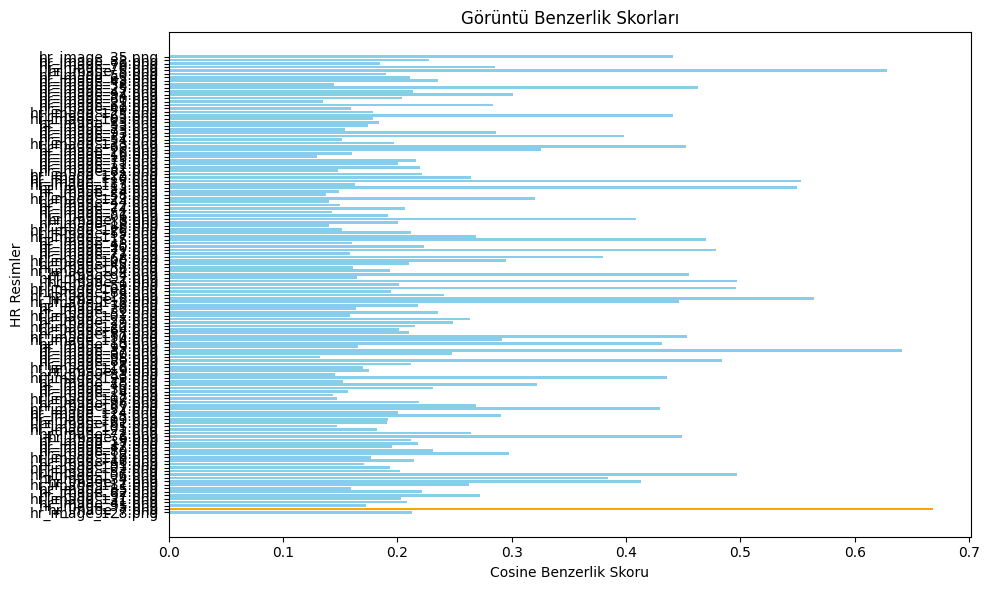

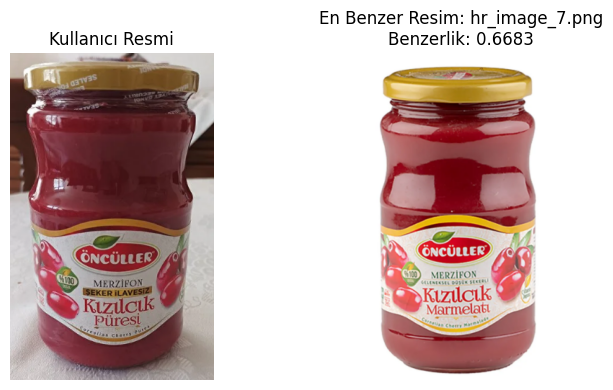

In [7]:
def run_all_tests_with_plots():
    user_image_path = "lr_images/lr_image_7.png"  
    hr_images_folder = "hr_images/"
    test_vgg_model_loading()
    test_feature_extraction()
    test_image_loading(user_image_path, hr_images_folder)
    test_cosine_similarity()
    test_find_most_similar_image_with_plot(user_image_path, hr_images_folder)
run_all_tests_with_plots()
